### 데이터수집 : 스마트팜 빅데이터

In [1]:
######## 1단계 데이터 수집
import requests
apikey = "021e19b7e91646c5b8e404c792fc6eb4"

api = "http://www.smartfarmkorea.net/Agree_WS/webservices/ProvideRestService/getIdentityDataList/{key}"
url = api.format(key = apikey)
response = requests.get(url)

######## 2단계 ...html 형태로 의미 부여하기
from bs4 import BeautifulSoup
import requests

re = response.json()
# soup = BeautifulSoup(re, "html.parser") # html 문자열이 아닌 <> 형태로 표현
# soup
re



[{'statusCode': '00',
  'statusMessage': 'NORMAL_CODE',
  'userId': 'LSDS_001',
  'facilityId': 'LSDS_001_01',
  'addressName': '경상남도 하동군',
  'itemCode': '413000'},
 {'statusCode': None,
  'statusMessage': None,
  'userId': 'LSDS_002',
  'facilityId': 'LSDS_002_01',
  'addressName': '충청남도 천안시',
  'itemCode': '413000'},
 {'statusCode': None,
  'statusMessage': None,
  'userId': 'LSDS_003',
  'facilityId': 'LSDS_003_01',
  'addressName': '충청남도 천안시',
  'itemCode': '413000'},
 {'statusCode': None,
  'statusMessage': None,
  'userId': 'LSDS_005',
  'facilityId': 'LSDS_005_01',
  'addressName': '경기도 여주군',
  'itemCode': '413000'},
 {'statusCode': None,
  'statusMessage': None,
  'userId': 'LSDS_006',
  'facilityId': 'LSDS_006_01',
  'addressName': '경상북도 포항시',
  'itemCode': '413000'},
 {'statusCode': None,
  'statusMessage': None,
  'userId': 'PFS_0000001',
  'facilityId': 'PFS_0000001_01',
  'addressName': '경상남도 사천시',
  'itemCode': '080300'},
 {'statusCode': None,
  'statusMessage': None,
  '

In [2]:
######## 3단계 
import pandas as pd

list_all = []

for i in range(0, len(re), 1) :
    list_all.append([re[i]["addressName"]])

list_all
########################
col_nm=["주소"]

new_df = pd.DataFrame(list_all, columns=col_nm)
new_df


,주소
0,경상남도 하동군
1,충청남도 천안시
2,충청남도 천안시
3,경기도 여주군
4,경상북도 포항시
...,...
887,세종특별자치시 연동면
888,세종특별자치시 연동면
889,세종특별자치시 연동면
890,세종특별자치시 연동면


In [3]:
new_df2 = new_df["주소"].str.split(' ')
new_df2 = new_df2.dropna()
new_df2

0         [경상남도, 하동군]
1         [충청남도, 천안시]
2         [충청남도, 천안시]
3          [경기도, 여주군]
4         [경상북도, 포항시]
            ...      
887    [세종특별자치시, 연동면]
888    [세종특별자치시, 연동면]
889    [세종특별자치시, 연동면]
890    [세종특별자치시, 연동면]
891    [세종특별자치시, 연동면]
Name: 주소, Length: 806, dtype: object

In [4]:
new_df3 = new_df2.apply(lambda x: pd.Series(x))
new_df3

,0,1,2
0,경상남도,하동군,NaN
1,충청남도,천안시,NaN
2,충청남도,천안시,NaN
3,경기도,여주군,NaN
4,경상북도,포항시,NaN
...,...,...,...
887,세종특별자치시,연동면,NaN
888,세종특별자치시,연동면,NaN
889,세종특별자치시,연동면,NaN
890,세종특별자치시,연동면,NaN


In [5]:
new_df4 = new_df3[[0,1]].reset_index(drop=True)
new_df4

,0,1
0,경상남도,하동군
1,충청남도,천안시
2,충청남도,천안시
3,경기도,여주군
4,경상북도,포항시
...,...,...
801,세종특별자치시,연동면
802,세종특별자치시,연동면
803,세종특별자치시,연동면
804,세종특별자치시,연동면


In [6]:
new_df4.columns = ["시도", "시군구"]
new_df4

,시도,시군구
0,경상남도,하동군
1,충청남도,천안시
2,충청남도,천안시
3,경기도,여주군
4,경상북도,포항시
...,...,...
801,세종특별자치시,연동면
802,세종특별자치시,연동면
803,세종특별자치시,연동면
804,세종특별자치시,연동면


In [7]:
new_df4["시도"].value_counts()

전라남도       221
전라북도       109
경상북도        98
경기도         90
경상남도        78
충청남도        66
충청북도        57
강원도         47
세종특별자치시     18
제주특별자치도     13
광주광역시        5
부산광역시        3
대전광역시        1
Name: 시도, dtype: int64

In [13]:
new_df5 = pd.DataFrame(new_df4["시도"].value_counts())
new_df5

,시도
전라남도,221
전라북도,109
경상북도,98
경기도,90
경상남도,78
충청남도,66
충청북도,57
강원도,47
세종특별자치시,18
제주특별자치도,13


In [16]:
x = new_df5.index
x
labels = [str(i) for i in x]
print(labels)

['전라남도', '전라북도', '경상북도', '경기도', '경상남도', '충청남도', '충청북도', '강원도', '세종특별자치시', '제주특별자치도', '광주광역시', '부산광역시', '대전광역시']


In [25]:
values = new_df5["시도"].values
values

array([221, 109,  98,  90,  78,  66,  57,  47,  18,  13,   5,   3,   1],
      dtype=int64)

In [23]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import json

In [27]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

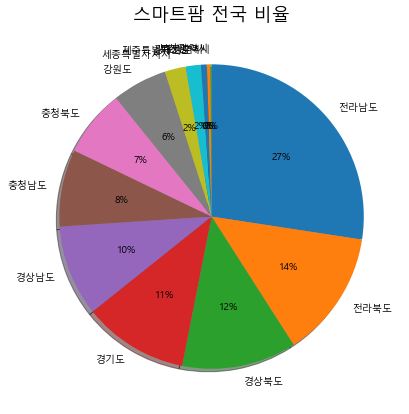

In [31]:
plt.figure(figsize=(7,7))

plt.pie(values, labels=labels, startangle=90, shadow=True, autopct="%1.f%%", counterclock=False)
plt.title("스마트팜 전국 비율", fontsize=18)
plt.show()

In [9]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [10]:
file_path = "./data/foilum/행정구역별_위경도_좌표.xlsx"
dfkw = pd.read_excel(file_path, sheet_name=1)
dfkk = pd.read_excel(file_path, sheet_name=2)
dfkn = pd.read_excel(file_path, sheet_name=3)
dfkb = pd.read_excel(file_path, sheet_name=4)
dfkj = pd.read_excel(file_path, sheet_name=5)
df6 = pd.read_excel(file_path, sheet_name=6)
dfdj = pd.read_excel(file_path, sheet_name=7)
dfbs = pd.read_excel(file_path, sheet_name=8)
dfsj = pd.read_excel(file_path, sheet_name=9)
df10 = pd.read_excel(file_path, sheet_name=10)
dfjn = pd.read_excel(file_path, sheet_name=11)
dfjb = pd.read_excel(file_path, sheet_name=12)
dfjj = pd.read_excel(file_path, sheet_name=13)
dfcn = pd.read_excel(file_path, sheet_name=14)
dfcb = pd.read_excel(file_path, sheet_name=15)
df16 = pd.read_excel(file_path, sheet_name=16)


In [11]:
new_df4["시도"].unique()

array(['경상남도', '충청남도', '경기도', '경상북도', '전라북도', '전라남도', '강원도', '충청북도',
       '제주특별자치도', '광주광역시', '부산광역시', '대전광역시', '세종특별자치시'], dtype=object)

In [12]:
df_kn = new_df4[new_df4["시도"] == "경상남도"].reset_index(drop=True)
df_cn = new_df4[new_df4["시도"] == "충청남도"].reset_index(drop=True)
df_kk = new_df4[new_df4["시도"] == "경기도"].reset_index(drop=True)
df_kb = new_df4[new_df4["시도"] == "경상북도"].reset_index(drop=True)
df_jb = new_df4[new_df4["시도"] == "전라북도"].reset_index(drop=True)
df_jn = new_df4[new_df4["시도"] == "전라남도"].reset_index(drop=True)
df_kw = new_df4[new_df4["시도"] == "강원도"].reset_index(drop=True)
df_cb = new_df4[new_df4["시도"] == "충청북도"].reset_index(drop=True)
df_jj = new_df4[new_df4["시도"] == "제주특별자치도"].reset_index(drop=True)
df_kj = new_df4[new_df4["시도"] == "광주광역시"].reset_index(drop=True)
df_bs = new_df4[new_df4["시도"] == "부산광역시"].reset_index(drop=True)
df_dj = new_df4[new_df4["시도"] == "대전광역시"].reset_index(drop=True)
df_sj = new_df4[new_df4["시도"] == "세종특별자치시"].reset_index(drop=True)

In [13]:
dfkw = dfkw[dfkw["읍면동/구"].isnull()].reset_index(drop=True)
dfkk = dfkk[dfkk["읍면동/구"].isnull()].reset_index(drop=True)
dfkn = dfkn[dfkn["읍면동/구"].isnull()].reset_index(drop=True)
dfkb = dfkb[dfkb["읍면동/구"].isnull()].reset_index(drop=True)
dfkj = dfkj[dfkj["읍면동/구"].isnull()].reset_index(drop=True)
dfdj = dfdj[dfdj["읍면동/구"].isnull()].reset_index(drop=True)
dfbs = dfbs[dfbs["읍면동/구"].isnull()].reset_index(drop=True)
dfsj = dfsj[dfsj["읍면동/구"].isnull()].reset_index(drop=True)
dfjn = dfjn[dfjn["읍면동/구"].isnull()].reset_index(drop=True)
dfjb = dfjb[dfjb["읍면동/구"].isnull()].reset_index(drop=True)
dfjj = dfjj[dfjj["읍면동/구"].isnull()].reset_index(drop=True)
dfcn = dfcn[dfcn["읍면동/구"].isnull()].reset_index(drop=True)
dfcb = dfcb[dfcb["읍면동/구"].isnull()].reset_index(drop=True)

In [14]:
kw = pd.merge(df_kw,dfkw).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
kk = pd.merge(df_kk,dfkk).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
kn = pd.merge(df_kn,dfkn).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
kb = pd.merge(df_kb,dfkb).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
kj = pd.merge(df_kj,dfkj).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
dj = pd.merge(df_dj,dfdj).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
bs = pd.merge(df_bs,dfbs).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
sj = pd.merge(df_sj,dfsj).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
jn = pd.merge(df_jn,dfjn).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
jb = pd.merge(df_jb,dfjb).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
jj = pd.merge(df_jj,dfjj).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
cn = pd.merge(df_cn,dfcn).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)
cb = pd.merge(df_cb,dfcb).drop_duplicates()[["시도", "시군구", "위도", "경도"]].reset_index(drop=True)

In [15]:
new_location = pd.concat([kw, kk, kn, kb, kj, dj, bs, sj, jn, jb, jj, cn, cb]).reset_index(drop=True)
new_location

,시도,시군구,위도,경도
0,강원도,철원군,38.146861,127.313472
1,강원도,평창군,37.370770,128.390193
2,강원도,인제군,38.069732,128.170352
3,강원도,태백시,37.164132,128.985735
4,경기도,평택시,36.992354,127.112695
...,...,...,...,...
91,충청북도,청주시,36.642499,127.488975
92,충청북도,진천군,36.855420,127.435602
93,충청북도,옥천군,36.306437,127.571419
94,충청북도,보은군,36.489455,127.729485


In [16]:
import numpy as np
import pandas as pd
import folium

In [17]:
import warnings

warnings.filterwarnings(action='ignore')

In [18]:
#한글깨짐 해결
!pip3 install git+https://github.com/python-visualization/branca.git@master

  Cloning https://github.com/python-visualization/branca.git (to revision master) to c:\users\admin\appdata\local\temp\pip-req-build-7sy33jdr
  Resolved https://github.com/python-visualization/branca.git to commit 52b10bd969ac25d0b70640b2eee2ea1d8e8690b3
  Created wheel for branca: filename=branca-0.5.0+5.g52b10bd-py3-none-any.whl size=24515 sha256=e73c9281d280345f9d4e47f8f18ecb3dc72c7fd7c01d6538064a36199d5afa62
  Stored in directory: C:\Users\admin\AppData\Local\Temp\pip-ephem-wheel-cache-d0an_4_x\wheels\90\e5\13\eccb91011560564109ba4ebad51c8a1a32f5ba65112e7bcb03
Successfully built branca
  Attempting uninstall: branca
    Found existing installation: branca 0.5.0
    Uninstalling branca-0.5.0:
      Successfully uninstalled branca-0.5.0


  Running command git clone -q https://github.com/python-visualization/branca.git 'C:\Users\admin\AppData\Local\Temp\pip-req-build-7sy33jdr'


# 지도 표현

In [27]:
m = folium.Map(
    location=[36.3504396, 127.3849508]
)
m

In [22]:
location = new_location.dropna()

In [24]:
location.iloc[0]
location.iloc[0]['시군구']
location.iloc[0]['위도']
location.iloc[0]['경도']

127.313472

In [25]:
location.shape

(95, 4)

In [26]:
for i in range(location.shape[0]):
    print(location.iloc[i]['시군구'], location.iloc[i]['위도'], location.iloc[i]['경도'])

철원군 38.146861 127.313472
평창군 37.37077 128.390193
인제군 38.069732 128.170352
태백시 37.164132 128.985735
평택시 36.9923537 127.1126947
이천시 37.272342 127.435034
용인시 37.2412522 127.1774916
화성시 37.199565 126.831405
오산시 37.149887 127.077462
안성시 37.0080546 127.2797732
안양시 37.3942905 126.9567534
안산시 37.3219123 126.8308176
연천군 38.096738 127.074755
양주시 37.785329 127.045847
광주시 37.4294306 127.2550476
파주시 37.760186 126.779883
여주시 37.206085 127.662538
김포시 37.61535 126.715544
하동군 35.067333 127.751275
사천시 35.0034774 128.0638649
함안군 35.272315 128.406595
진주시 35.180325 128.107646
거창군 35.686698 127.909538
창녕군 35.544611 128.492346
밀양시 35.503856 128.746712
김해시 35.228574 128.889322
산청군 35.415557 127.873458
합천군 35.56666 128.165799
창원시 35.2278771 128.6818746
의령군 35.3222239 128.261676
고성군 34.9730975 128.3222643
양산시 35.335049 129.037339
포항시 36.0190333 129.3433898
상주시 36.411002 128.159229
성주군 35.919175 128.282959
경주시 35.856242 129.224784
안동시 36.568425 128.7295375
김천시 36.1397714 128.1136148
청도군 35.647399 128.733988
고령군 

# 스마트팜 마커표시(for문으로 구현)

In [35]:
m = folium.Map(
    location=[36.3504396, 127.3849508],
    tiles = "OpenStreetMap",
    zoom_start=8
    
)

tooltip = 'Click!'

for i in range(location.shape[0]):

    folium.Marker(
        [location.iloc[i]['위도'], location.iloc[i]['경도']],
        popup = f"<strong>{location.iloc[i]['시군구']}</strong>",
        tooltip = tooltip
    ).add_to(m)


m.save("./project2/project2app/templates/project2app/01_smartfarmcenter.html")
m